In [4]:
# Одномерные быстрые преобразования Фурье

from IPython.display import display, Math, Latex
display(Math(r'F_k=\sum_{m=0}^{n-1}f_m \exp{\left(-\frac{2\pi imk}{n}\right)}, k = 0, 1, 2, ..., n - 1'))

<IPython.core.display.Math object>

In [5]:
import numpy as np
from matplotlib import pylab as plt
%matplotlib inline

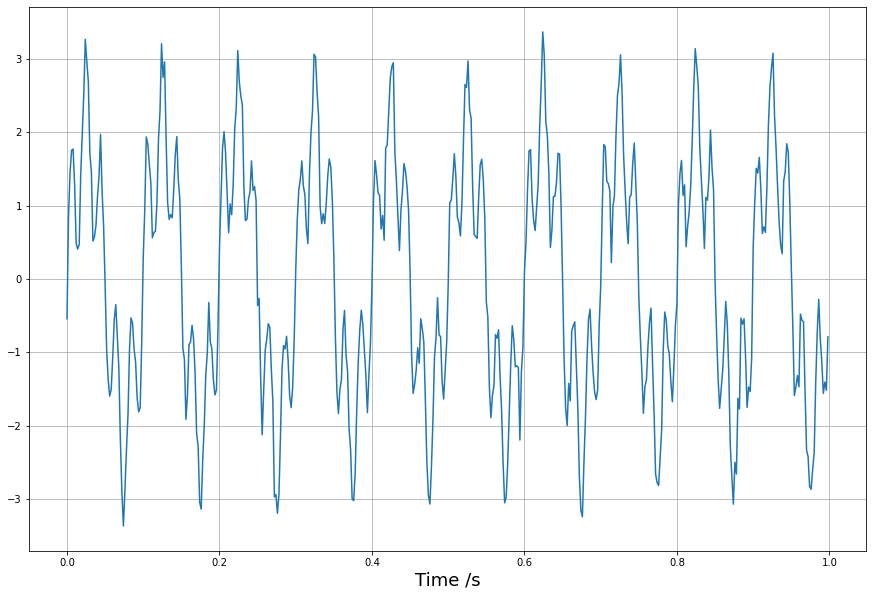

In [7]:
A1, A2 = 2, 1
freq1,freq2 = 10, 50
fsamp = 500
t = np.arange(0, 1, 1/fsamp)
n = len(t)
f = A1*np.sin(2*np.pi*freq1*t) + A2*np.sin(2*np.pi*freq2*t)
f += 0.2 * np.random.randn(n)

plt.figure(figsize=(15,10))
plt.plot(t, f)
plt.xlabel('Time /s', fontsize = 18)
plt.grid()
plt.show()

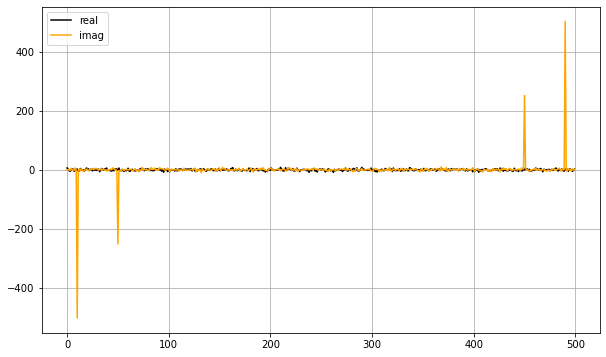

In [11]:
F = np.fft.fft(f)
plt.figure(figsize=(10,6))
plt.plot(F.real, 'k', label='real')
plt.plot(F.imag, 'orange', label='imag')
plt.legend(loc=2)
plt.grid()
plt.show()

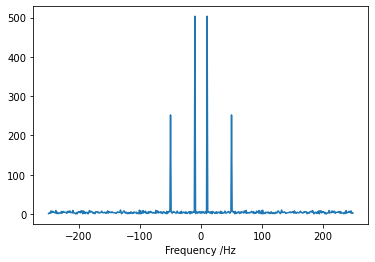

In [12]:
freq = np.fft.fftfreq(n, 1/fsamp) # смещенный амплитудный спектр с компонентой нулевой 
# частоты в центре
F_shifted = np.fft.fftshift(F)
freq_shifted = np.fft.fftshift(freq)
plt.plot(freq_shifted, np.abs(F_shifted))
plt.xlabel('Frequency /Hz')
plt.show()

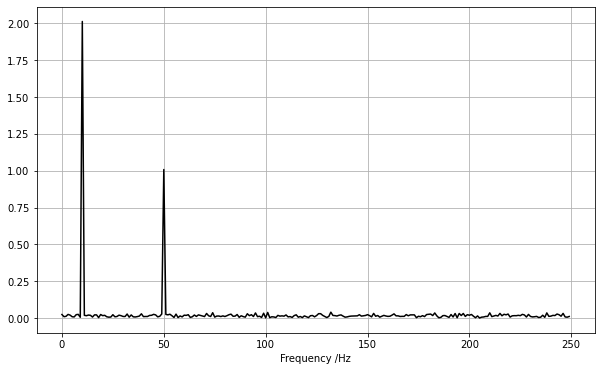

In [13]:
spec = 2/n * np.abs(F[:n//2])  
# Положительные компоненты частоты преобразования Фурье для формы колеба-
# ний сигнала с шумом, нормализованные для выделения их интенсивностей
plt.figure(figsize=(10,6))
plt.plot(freq[:n//2], spec, 'k')
plt.xlabel('Frequency /Hz')
plt.grid()
plt.show()

In [22]:
# Двумерные быстрые преобразования Фурье
display(Math(r'F_{jk}=\sum_{p=0}^{m-1}\sum_{q=0}^{n-1}f_{pq} \exp{\left[-2\pi\left(\frac{pj}{m}+\frac{qk}{n}\right)\right]}, j = 0, 1, 2, ..., m - 1, k = 0, 1, 2, ..., n - 1'))

<IPython.core.display.Math object>

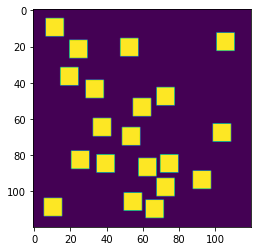

In [23]:
# eg6-fft2 -blur.py
import numpy as np
import matplotlib.pyplot as plt
# Размер изображения, длина стороны квадрата, количество квадратов.
ncols, nrows = 120, 120
sq_size, nsq = 10, 20
# Массив изображения (0 = фон, 1 = квадрат) и массив логических значений для позиций,
# в которых разрешено добавлять квадраты так, чтобы они не касались друг друга
# и границ изображения.
image = np.zeros((nrows, ncols))
sq_locs = np.zeros((nrows, ncols), dtype=bool)
sq_locs[1:-sq_size -1:,1:-sq_size -1] = True
def place_square():
    """ Place a square at random on the image and update sq_locs. """
    # """ Размещение квадрата в случайной локации изображения и обновление sq_locs. """
    # valid_locs - массив индексов элементов True в sq_locs.
    valid_locs = np.transpose(np.nonzero(sq_locs))
    # Случайный выбор одного такого элемента и добавление квадрата так, чтобы его верхний
    # левый угол располагался в этой локации; затем обновление sq_locs.
    i, j = valid_locs[np.random.randint(len(valid_locs))]
    image[i:i+sq_size, j:j+sq_size] = 1
    imin, jmin = max(0, i-sq_size -1), max(0, j-sq_size -1)
    sq_locs[imin:i+sq_size+1, jmin:j+sq_size+1] = False
# Добавление требуемого количества квадратов в изображение.
for i in range(nsq):
    place_square()
plt.imshow(image)
plt.show()

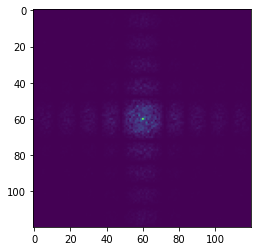

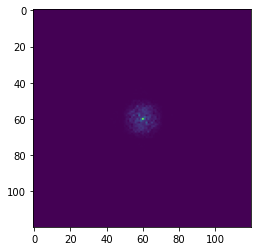

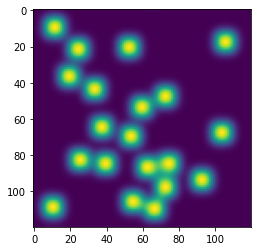

In [24]:
# Применение двумерного ДПФ и центрирование значений частот.
ftimage = np.fft.fft2(image)
ftimage = np.fft.fftshift(ftimage)
plt.imshow(np.abs(ftimage))
plt.show()
# Создание и применение гауссова фильтра.
sigmax, sigmay = 10, 10
cy, cx = nrows/2, ncols/2
x = np.linspace(0, nrows, nrows)
y = np.linspace(0, ncols, ncols)
X, Y = np.meshgrid(x, y)
gmask = np.exp(-(((X-cx)/sigmax)**2 + ((Y-cy)/sigmay)**2))
ftimagep = ftimage * gmask
plt.imshow(np.abs(ftimagep))
plt.show()
# Завершающий этап: применение обратного преобразования и вывод размытого изображения.
imagep = np.fft.ifft2(ftimagep)
plt.imshow(np.abs(imagep))
plt.show()